# <center> <u>Reinforcement learning</u>:: Q-learning style</center>

<h1><center>What will you do in this Notebook?</center></h1>
<br>


### 1.) You will learn what Q-learning is 
-- (hint, it's not really <i>learning</i> but "Q-Lookup-Table" doesn't have the same ring to it!)

### 2.) You will learn about the "Gym" 
-- <a href="https://github.com/openai/gym">Gym</a> is a toolkit for developing and comparing reinforcement learning algorithms. <br/>
-- Built by AI research company <a href="https://openai.com/">OpenAI</a> <br/>
-- There are many, many toolkits available but this notebook only uses Gym.

### 3.) You will train an Agent to find the optimal solution to the Gym - Taxi Environment
-- There will be more details on the Taxi environment later, but here's a peek at the environment in all of it's ASCII glory:
<center><img src=".\img\taxi-v2.png" alt="TaxiV2"/>



<h1><center>Q-Learning </center></h1>

<p>The <b>Q</b> stands for quality.  Or, what is the <i><b>quality of the reward signal<b></i> for being in a particular state.  Recall that our agent's goal is <b><i>Maximize the reward signal</i></b> (the Reward Hypothesis).  Each state in the environment will have a reward attached to it.  This reward can be positive or negative.</p> 


<p> A few more items of note before we jump into Q-Learning</p>
- Agents are treated like cattle - not pets.  Your agent will <i>"die"</i> many deaths as it explores the environment.
    <br/>
- Each time an agent "dies" or completes the task (Maximize the reward signal) it is called an <b>Episode</b>.
    <br/>
- Q-Learning is the oldest, most basic form of RL and belongs to what is known as <b>Tabular Solution Methods</b>
    <br/>
- <i>Many</i> timesteps make up an episode.  The number of timesteps per episode will vary. Although it is called a timestep there is no specific or set amout of "wall time" associated with each timestep.  Think of a timestep as one complete cycle of: <br/>
>  - the agent makes an <b>Observation</b> - which means it receives the state of the observable portion of the environment written as: <img src=".\img\symbols\state_at_timestep_t.png" alt="stateATt" height="87" width="92" /> <center>(State at timestep 't')</center><br/>
>  - based on the Observed state the agent selects a <b>discrete action</b> from the <b>Action space</b>
> >  - A <i><b>discrete</b></i> action means the action you select is not dependent on any other actions
> >  - the <i><b>Action space</b></i> is a finite list of actions your agent can choose from - this list of actions is managed
by the environment.  Sorry, no <a href="http://www.startrek.com/database_article/kobayashi-maru">Kobayashi Maru</a> scenarios allowed in RL.
<img src=".\img\symbols\action_at_timestep_t.png" alt="actionATt" height="87" width="93"/><center>(Action at timestep 't')</center>
>  - The agent takes the selected action and receives the <b>reward</b> signal associated with that action in that state. Written as: <img src=".\img\symbols\reward_at_time_t.png" alt="rewardATt" height="87" width="93"/><center>(Reward at timestep 't')</center><br/>
>  - These three steps form the basis for The agent-environment interaction<br/><img src=".\img\agent-enviro-interaction.png" alt="agent-enviro"/>
- In Q-Learning scenarios the agent will attempt EVERY discrete action from the action space at each state of the environment to form what is known as the Q-table. 
 

<h1><center>Q-Learning - a codeless example </center></h1>

<p>Given the environment in the image below - a simple 5X5 grid world (just like Taxi-v2).  Our agent must reach the treasure without entering any of the danger zones denoted by the digi-monsters.<p>
- Our agent can only move 1 tile per time step (This is a discrete action)
- Our agent can only move Up, Down, Left or Right (this is the Action Space)
- The danger zones are stationary and remain in the same tiles for all episodes
- If our agent enters a danger zone, the agent receives a reward of -100 and the episode ends (in a "loss")
- The agent receives a -1 reward for each timestep. (this encourages the agent to take the shortest path)
- The agent receives a reward of +100 when it reaches the treasure and the episode ends (in a "win")
<br/>
<br/>
<center><img src=".\img\enviro1.png" alt="enviro1" height="725" width="692"/></center>
<br/>    
Over many episodes and timesteps of "learning" the agent will explore the reward signal for each action at each state.  
Upon completion of this "training", the agent will know the <b>reward signal</b>  for each state in the environment, shown in the image below.
<br/>
<br/>
<center><img src=".\img\enviro1_reward.png" alt="enviro1reward" height="725" width="692"/><center>
<br/>
    
<p>Recall that Reinforcement learning is meant to <b><span style="background-color: #FFFF00">MAXIMIZE</span></b> the <b>reward signal</b> not just determine the <b>reward signal</b> for each state of the environment. Knowing each states reward signal and choosing a route to the treasure that will MAXIMIZE the reward are two different things.</p>

This is where the Q-table can help us. The Q-table allows to calculate the <b>maximum expected future reward</b> by storing the reward for each action in each state (or tile).

>   The image below represents all available actions in each state of our environment.  Red Xs represent moves that are disallowed and are the boudaries to the environment.
<center><img src=".\img\enviro1_actionspace.png" alt="enviro1actionspace" height="725" width="692"/><center>
<br/>
<br/>

- The Q-table will consist of ONE row for each state in the environment.  
- Since our example is a 5X5 gridworld, and the non-agent objects (treasure, digi-monsters) do not move between episodes, our Q-table will have (5 x 5 = 25) rows.
- The Q-table will have a column for each action in the action space.  For our example then, our Q-table will have 4 columns.

Here is what two rows from our Q-table would look like after the Q-Learing algorithm has fully populated them:
<br/>
<img src=".\img\state_to_q_table_samples.png" alt="stateToQtable"/>


These are simply two states sampled from our treasure hunt environment. An actual qTable, once fully populated will have entries for each state in the environment.

<h2>The Q-learning <i>Algorithm</i></h2>
<p>Now that you have had an introduction to the Q-table, we will move on to the Q-learning <b>algorithm</b>. This algorithm contains the steps that we will use to populate the values in the Q-table.</p>  

- When our training begins we initialize an empty Q-table.  
- Each entry in the Q-table is set to zero.
<br/>
<b>Now we begin the agent-environment interaction:</b>
>  - Our agent makes an observation and chooses an action
>  - The agent takes the action
>  - Our agent receives the reward
>  - The Q-table is updated to refelect the reward received at the respective state predicated on the respective action

<h2>The Q-learning Algorithm:</h2>
<img src=".\img\symbols\q_action_value_function.png" alt="actvalfunc"/>
<br/>
<h2>The Q-learning Algorithm explained:</h2>
<img src=".\img\q_algo_explained.png" alt="qalgoExpl"/>

All the elements of this algorithm should be familiar except one.  We have introduced a "discount" to our equation.

<img src=".\img\symbols\gamma.png" alt="gamma" height="75" width="75"/>

<p>The discount rate determines the <i>present</i> value of <i>future</i> rewards. a reward received <i>k</i> timesteps into the future is worth only: $\gamma^{k-1}$
times what it would be worth if it were received immediately.

<h3>Greedy Epsilon and the Bellman Equation</h3>

Let's talk about two more components of Q-learning (and many other forms of RL) and then we will get to some code!

<b>Greedy Epsilon </b>

Greedy epsilon is the name given to the concept of balancing Exploration vs Exploitation.

If our agent knows the value of taking an action in a given state, it can <b>EXPLOIT</b> that knowledge.  But what if our agent does not know the value of taking an action at a given state?  Then it must <b>EXPLORE</b>.

We call it <i>greedy</i> because we want to choose the option that maximizes our reward signal.

We use $\epsilon$ (epsilon) to represent the value because $\epsilon$ is a small positive infinitesimal quantity, whose limit is usually taken as $\epsilon\to0$ and our $\epsilon$ value is incremented between 0 and 1.

We we start training, we being with a high $\epsilon$ to encourage exploration.  As more and more of the environment is explored we reduce $\epsilon$ and begin to exploit where advantageous.

<img src=".\img\expvsexp.png" alt="expvsexp"/>
<br/>

<b> The Bellman Equation </b>

The Bellman Equation is the means by which we update existing values in our Q-table.  Recall that the table is initialized with zeros.  Also recall that the reward at a given state is predicated on current AND future actions of our agent.

<img src=".\img\symbols\bellmaneq.png" alt="bellman"/>
<br/>
The Bellman equation explained:
<img src=".\img\bellmanexplained.png" alt="bellmanexp"/>

Finally - some code!  Lets import our libraries:

In [36]:
import gym                           # The toolkit for developing and comparing reinforcement learning algorithms. 
import numpy as np                   # Matrix Multiplication library (our Q-table is a matrix)
import sys                           # needed to cleanup the output statements from training
import random                        # needed to generate random numbers
import matplotlib.pyplot as plt      # Needed for graphing our agents training progress

<h3>Gym</h3>

- The Gym library greatly simplifies the process of developing RL algorithms.  
- In this notebook we will work with the built-in "toy-text" environment called "Taxi-V2".  
- Gym has many built in libraries and is fully open sourced so it can be extended (to use Atari ROMs as environments for example)

- Gym maps our action commands to the movements of the agent within the gym environment.  Taxi-v2 is a small action space, but  environments can have many more than 4 discrete actions.
- Gym provides the ability to pick a random action
- Gym provides Episode management 
- Gym provides state management
- Gym tells us if our agent as "solved" the environment or if it has expired
- It is highly recommended you familiarize yourself with the <a href="https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py">sourcecode</a> for the environment you are working with.  It is there you will find the discrete actions available, rendering and reward details, etc. 

In [12]:
# Instantiate and prepare the Environment
env = gym.make("Taxi-v2")

# If you would like to see all of Gym's available environments you can uncomment and run these two lines:
#from gym import envs
#for enviro in envs.registry.all(): print(enviro)

# Store action space and state_size.
action_size = env.action_space.n
state_size = env.observation_space.n

# Let's take a look at our environment:
env.render()

# Note that Taxi-v2 is a simple ascii based environment.  Some environments and toolkits may require graphics capabilities

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [13]:
# Map Key

print("Blue Letter = Passenger")
print("Magenta Letter = destination")
print("Yellow = empty taxi")
print("Green = full taxi")
print("Letters = all possible pick up and drop off locations")

Blue Letter = Passenger
Magenta Letter = destination
Yellow = empty taxi
Green = full taxi
Letters = all possible pick up and drop off locations


In [37]:
# Initialize our empty Q-table
qtable = np.zeros((state_size, action_size))
print("Q-table initialized with {} states and {} discrete actions available per state".format(state_size, action_size))

Q-table initialized with 500 states and 6 discrete actions available per state


Recall that our Qtable is a matrix with 1 row for each possible state, and 1 column for each discrete action
<img src=".\img\state_to_q_table_samples.png" alt="stateToQtable"/>

If the taxi environment is a 5 x 5 [ascii] grid, why does our Q table have 500 states!!??

- In our treasure hunting example above, the digi-monsters where stationary. We also made the assumption our agent would begin each episode in the same starting state.  

<img src=".\img\taxi_states.png" alt="taxistates"/>


In [17]:
# lets take a look at a sample environment (it will look slightly different rendered in a notebook than at a console)
env.render()

# remember the meanings of the colors
# where is the passenger?
# where is the drop off point?

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [38]:
# we need to set a few variables now in order to setup training for our agent

total_train_episodes = 10000    # How many times do we attempt to train on the Taxi environment (known as an episode)
total_test_episodes = 10        # Number of episodes to test our qtable (should only take a few to verify maximized reward)
learning_rate = 0.7             # Learning rate for Bellman equation
gamma = 0.618                   # Gamma rate for the Bellman equation
max_steps = 100                 # How many steps do we limit each episode to
current_steps = 0               # Holder for the current step of the current training episode
total_reward = 0                # Holder for the Cumulative reward of the current episode

# Exploration parameter
epsilon = 1                     # Greedy Epsilon
max_epsilon = 1                 # Maximum Epsilon value
min_epsilon = 0.1               # Minimum epsilon value
decay_rate = .001               # Amount to reduce epsilon value after each episode.

# Some variables to help us review our agents training progress
epsilontrackers = []            # List to hold each epsilon value change for future viewing
explore_counter = 0             # Counter that increments with each choice to explore
explore_tracker = []            # list to hold the decision to explore
exploit_counter = 0             # Counter that increments with each choice to exploit
exploit_tracker = []            # List to hold the decision to exploit

In [39]:
# It's finally time to train

# The agent-environment interaction:

        # 1.) Make an Observation/ receive state information from the environment
        # 2.) Choose an action predicated on the data within state and propensity to explore or exploit
        # 3.) execute the action and receive the reward, update the qTable
        
for episode in range(total_train_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    for step in range(max_steps):
        print(f"\r{episode} of {total_train_episodes} total episodes", end="")
        sys.stdout.flush()
        
        # ************* Step One ***********************************************************************************
        # Make an Observation/ receive state information from the environment **************************************
        
        # because we are within a for loop, the first (step one) observation\state info has been established by the
        # "state = env.reset()" code above, prior to entering this loop
        
        # **********************************************************************************************************
        
        
        # ************* Step Two ***********************************************************************************
        # Choose an action predicated on the data within state and propensity to explore or exploit ****************
        
        # 2-A.) First we create a random number between 0 and 1
        exp_exp_tradeoff = random.uniform(0, 1)

        # 2- B.) If the random number created above is greater than our current epsilon value -> we choose to exploit
        # recall "exploit" means to be "greedy" and take the max value for this state from the Q-table
        
        # in the early timesteps the value of epsilon is very high - so this random number is unlikely to exceed epsilon
        if exp_exp_tradeoff > epsilon:  
            action = np.argmax(qtable[state, :])  # <-- If this option was chosen we have just exercised "Greedy Epsilon"
            exploit_counter += 1
        else: 
            action = env.action_space.sample()    # <-- If this was our choice then we --> explore
            explore_counter += 1
        
        # Update our explore vs exploit trackers
        explore_tracker.append(explore_counter)
        exploit_tracker.append(exploit_counter)
        # **********************************************************************************************************

            
        # *************  Step Three ********************************************************************************
        # Take the action (a) and observe the outcome state(s') and reward (r) *************************************
        new_state, reward, done, info = env.step(action)

        # Probably the most important line of this example - our Bellman equation
        # recall the equation -> Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *np.max(qtable[new_state, :]) - qtable[
                                                                                         state, action])
        # **********************************************************************************************************
        
        
        # ************* Step One ***********************************************************************************
        # Make an Observation/ receive state information from the environment **************************************
        # because we are in a for-loop, the following command can be considered part of Step One 
       
        state = new_state  
        # what was once the new or next state is now the current state and the agent-environment loop repeats
        
        # **********************************************************************************************************

        # If done : finish episode
        if done:
            break

    # capture the current epsilon
    epsilontrackers.append(epsilon)

    # Each new epsiode - reduce epsilon by our chosen decay rate
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

print("Training complete! Disregard the episode counter above if it seems incorrect the notebook author has dubious python skills")

9751 of 10000 total episodes

In [41]:
# Once training is complete we will run the agent through the environment to determine if it can maximize the reward.

# We simply repeat the process we used to train, but rather than choosing to exploit or explore - we will use our qTable
# to navigate the environment
           
rewards = []           # An array to store our cumulative rewards to determine average 'reward per episode'
steps = []             # An array to store cumulative steps needed per episode to determine average 'steps per episode'  


for episode in range(total_test_episodes):
    state = env.reset()  # Always start with a fresh environment (we are clearing state data here)
    step = 0             # reset epsiode step counter
    done = False         # reset the episode over (done) flag
    total_rewards = 0    # reset the episode cumulative reward counter

    # The agent-environment interaction:

        # 1.) Make an Observation/ receive state information from the environment
        # 2.) Choose an action predicated on the data within state and propensity to explore or exploit
        # 3.) execute the action and receive the reward, update the qTable
        
    for step in range(max_steps): # max_steps is arbitrary - it could be set to 1,000,000 but if our agent has maximized the
        # reward signal the episode will end in very few steps.
        
        # Visualize the environment
        if episode is 0: # to limit scrolling in the output, we are only rendering the steps in the first episode
            env.render()
        
        # ************* Step One ***********************************************************************************
        # Make an Observation/ receive state information from the environment **************************************
        
        # because we are within a for loop, the first (step one) observation\state info has been established by the
        # "state = env.reset()" code above, prior to entering this loop
        
        # **********************************************************************************************************
        
        # ************* Step Two ***********************************************************************************
        # Choose an action that will maximize expected future reward  **********************************************
        # In our case will will choose the max value from the row in the QTable corresponding to our current state
        action = np.argmax(qtable[state, :])
        
        # **********************************************************************************************************
        
        # *************  Step Three ********************************************************************************
        # Take the action (a) and observe the outcome state(s') and reward (r) *************************************
        
        new_state, reward, done, info = env.step(action)

        total_rewards += reward

        # **********************************************************************************************************
        
        if done:
            rewards.append(total_rewards)
            steps.append(step)
            print("Episode {} complete!".format(episode))
            print("Completed in {} steps with a reward of {}".format(step, total_rewards))
            break
        
        # ************* Step One ***********************************************************************************
        # Make an Observation/ receive state information from the environment **************************************
        # because we are in a for-loop, the following command can be considered part of Step One
        
        state = new_state
        # what was once the new or next state is now the current state and the agent-environment loop repeats
        
        # **********************************************************************************************************
env.close()

print("\n All test episodes complete:")
print("Average number of steps per episode: {} average reward [score]: {}".format(sum(steps)/total_test_episodes, 
                                                                                      sum(rewards)/total_test_episodes))

# In the output window below you will see a rendering of each step of the first episode so you can track the starting point
# and progress of your agent through the environment as it picks up and drops off the passenger.

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |


We stored a bit of information while we trained, lets review that now.
Specifically, let's look at the rate of epsilon reduction in our greedy-epsilon implementation 

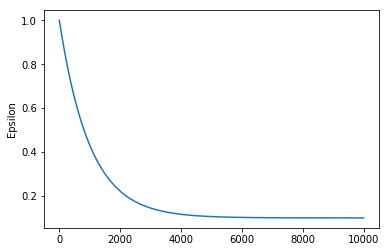

In [42]:
%matplotlib inline


plt.plot(epsilontrackers)
plt.ylabel('Epsilon')
plt.show()

Now lets look at the the agent's choice to explore or exploit.  
Explore = blue
Exploit = green

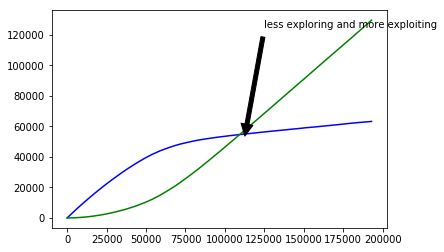

In [48]:
plt.plot(explore_tracker, 'b', exploit_tracker, 'g')
plt.annotate('less exploring and more exploiting', xy=(112000, 50000), xytext=(125000, 125000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

Let's revisit the qTable and see how it looks:

In [49]:
qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.32039715,  -2.13656497,  -2.32039715,  -2.13656497,
         -1.83910189, -11.13656497],
       [ -1.83910189,  -1.35777005,  -1.83910189,  -1.35777005,
         -0.57891593, -10.35777005],
       ...,
       [ -0.57891593,   0.6813658 ,  -0.57891593,  -1.35777005,
         -9.57891593,  -9.57891593],
       [ -2.32168462,  -2.13854509,  -2.33686835,  -2.13656497,
        -11.33298685, -11.32302683],
       [  6.02048   ,   2.72065664,   6.02048   ,  11.36      ,
         -2.97952   ,  -2.97952   ]])

What's left to do?  Here are some questions to think about while reflecting on this notebook:

-  If you wanted to persist this agent to use later - how would you save it?
-  We can optimize training with a more accurate value for the number of episodes required to train - how do we get a more accurate estimate for number of epsiodes needed?
